# Project 3, Part 4 - Hypothesis Testing

Kris Barbier

## Imports

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
from scipy import stats
pd.set_option('display.max_columns',100)

## Combine Data

In [2]:
#Check data that exists in Data folder
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'akas.csv.gz',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_2006.json',
 'tmdb_api_results_2007.json',
 'tmdb_api_results_2008.json',
 'tmdb_api_results_2009.json',
 'tmdb_results_combined.csv.gz']

In [3]:
#Use glob to find final_tmdb_data csv files
q = FOLDER+"final_*csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/final_*csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz']

In [4]:
#Use list comprehension to load all files into 1 data frame
df = pd.concat([pd.read_csv(f, lineterminator = '\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.951,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,19.202,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2298.0,PG


In [5]:
#Remove zero id
df = df.loc[df['imdb_id'] != '0']
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.951,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,19.202,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2298.0,PG
5,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.912,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [6]:
#Reset index
df = df.reset_index(drop = True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.951,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,19.202,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2298.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.912,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [7]:
#Save data to disk 
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz', compression = 'gzip', index = False)

## Load and Inspect Data

In [8]:
#Read in dataframe again to make sure it worked
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.951,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,19.202,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2298.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.912,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [9]:
#Preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                16898 non-null  object 
 1   adult                  16898 non-null  float64
 2   backdrop_path          9424 non-null   object 
 3   belongs_to_collection  1297 non-null   object 
 4   budget                 16898 non-null  float64
 5   genres                 16898 non-null  object 
 6   homepage               2763 non-null   object 
 7   id                     16898 non-null  float64
 8   original_language      16898 non-null  object 
 9   original_title         16898 non-null  object 
 10  overview               16513 non-null  object 
 11  popularity             16898 non-null  float64
 12  poster_path            14960 non-null  object 
 13  production_companies   16898 non-null  object 
 14  production_countries   16898 non-null  object 
 15  re

In [10]:
#Drop unnecessary columns for hypothesis tests
drop_cols = ['adult', 'backdrop_path', 'belongs_to_collection', 'homepage', 
             'original_title', 'overview', 'poster_path', 'status', 'tagline', 
             'video', 'budget', 'genres', 'id', 'original_language', 
             'popularity', 'production_companies', 'production_countries', 
             'spoken_languages', 'title',]
df = df.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        16898 non-null  object 
 1   release_date   16611 non-null  object 
 2   revenue        16898 non-null  float64
 3   runtime        16898 non-null  float64
 4   vote_average   16898 non-null  float64
 5   vote_count     16898 non-null  float64
 6   certification  5323 non-null   object 
dtypes: float64(4), object(3)
memory usage: 924.2+ KB


In [11]:
#Preview certification column values
df['certification'].value_counts(dropna = False)

NaN                                11575
R                                   2585
PG-13                               1260
NR                                   768
PG                                   524
G                                    135
NC-17                                 47
Unrated                                1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [12]:
#Remove extra space
df['certification'] = df['certification'].str.strip()

In [13]:
#Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      11575
R         2585
PG-13     1260
NR         772
PG         524
G          135
NC-17       47
Name: certification, dtype: int64

In [14]:
#Drop nan values
df = df.dropna(subset = 'certification')
df['certification'].value_counts()

R        2585
PG-13    1260
NR        772
PG        524
G         135
NC-17      47
Name: certification, dtype: int64

## Hypothesis Test 1:

- Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

### State the Hypotheses:

- Null: There is no difference between revenue generated for different ratings.
- Alternative: There is a significant difference between revenue generated for different ratings.
- Alpha = 0.05

### Select Test:

- Because we are comparing a numeric value (revenue) across multiple groups (ratings), I will use an ANOVA test.

### Test Assumptions:

- Assumptions of one-way ANOVA test:
    - No significant outliers.
    - Normality.
    - Equal Variance.

In [15]:
##Create groups dictionary
groups = {}
#Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [16]:
#Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T

#Checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,524.0,8.451953e-89,405.591351,True
R,2585.0,0.000000e+00,3046.168862,True
G,135.0,2.937061e-21,94.553755,True
NR,772.0,0.000000e+00,1506.620668,True
PG-13,1260.0,0.000000e+00,1655.945937,True
NC-17,47.0,2.921565e-15,66.933314,True


- Our data is not normally distributed, however, because there are more than 15 samples in each group, we can continue.

In [17]:
#Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=78.08838743712192, pvalue=2.84912924585618e-79)

- We have failed the equal variance test, which means we must use a non-parametric test instead of ANOVA. The alternate test will be a Kruskal-Wallis test.

### Execute Test:

- Kruskal-Wallis test

In [18]:
#Execute test
result = stats.kruskal(*groups)
print(result)
print(result.pvalue < .05)

KruskalResult(statistic=5.0, pvalue=0.4158801869955079)
False


/Users/krisbarber/anaconda3/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


### Interpretation:

- Our p-value is greater than our alpha of 0.05, therefore we fail to reject the null hypothesis. In our data, there is not a significant difference in average revenue generated per rating category.

### Supporting Visual

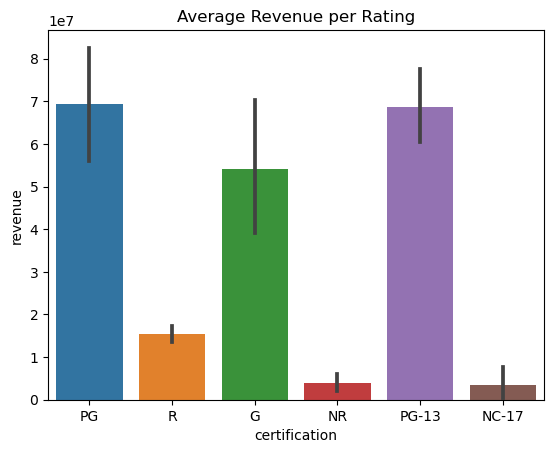

In [19]:
#Create barplot of revenue vs. rating
ax = sns.barplot(data = df, x= 'certification', y= 'revenue')
ax.set_title('Average Revenue per Rating');

## Hypothesis Test 2:

- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

### State Hypotheses:

- Null: There is no difference between groups of movies.
- Alternative: There is a significant difference between groups of movies.
- Alpha = 0.05

### Select Test:

- Because we are comparing a numeric outcome (revenue) to another numeric variable (runtime), I will use a 2-sample t-test.

### Select Groups:

- I will split the data into two groups: movies with a runtime over 2.5 hours (> 150), and movies with a runtime of 1.5 hours or less (<= 90).

In [20]:
#Add columns for long and short movies
df['is_long'] = df['runtime'] > 150
df['is_short'] = df['runtime'] <= 90
df.head()

,imdb_id,release_date,revenue,runtime,vote_average,vote_count,certification,is_long,is_short
3,tt0118694,2000-09-29,14204632.0,99.0,8.100,2298.0,PG,False,False
4,tt0118852,2000-09-02,0.0,99.0,6.642,53.0,R,False,False
5,tt0119273,2000-04-19,0.0,88.0,6.072,188.0,R,False,True
6,tt0119495,2000-08-24,0.0,86.0,0.000,0.0,R,False,True
10,tt0120467,2002-04-26,14904.0,87.0,5.500,44.0,R,False,True


In [21]:
#Separate into two groups
long = df.loc[df['is_long'] == True, ['revenue', 'is_long']]
short = df.loc[df['is_short'] == True, ['revenue', 'is_short']]
print(f'There are {len(long)} movies over 2.5 hours.')
print(f'There are {len(short)} movies under 1.5 hours.')

There are 87 movies over 2.5 hours.
There are 1745 movies under 1.5 hours.


In [22]:
#Create final groups
long_group = long['revenue']
short_group = short['revenue']
display(long_group.head(), short_group.head())

233     215294342.0
470             0.0
579       4900000.0
779      20908467.0
1247    871368364.0
Name: revenue, dtype: float64

5             0.0
6             0.0
10        14904.0
12    224834564.0
14            0.0
Name: revenue, dtype: float64

### Test Assumptions:

- Assumptions of 2-sample independent t-test:
    - No significant outliers
    - Normality
    - Equal variance

In [23]:
#Check for outliers in long group
zscores_long = stats.zscore(long_group)
outliers_long = abs(zscores_long)>3
np.sum(outliers_long)

1

In [24]:
#Remove outliers
long_group = long_group[(np.abs(stats.zscore(long_group)) < 3)]

In [25]:
#Check for outliers in short group
zscores_short = stats.zscore(short_group)
outliers_short = abs(zscores_short)>3
np.sum(outliers_short)

39

In [26]:
#Remove outliers
short_group = short_group[(np.abs(stats.zscore(short_group)) < 3)]

In [27]:
#Normal test: long group
result_long = stats.normaltest(long_group)
result_long

NormaltestResult(statistic=33.59991495198197, pvalue=5.0567463768920685e-08)

In [28]:
#Normal test: short group
result_short = stats.normaltest(short_group)
result_short

NormaltestResult(statistic=1608.9047812236483, pvalue=0.0)

- We do not have normally distributed data, however, the sample sizes are large enough that we can continue with the test.

In [29]:
#Test for equal variance
result = stats.levene(long_group, short_group)
result

LeveneResult(statistic=526.0086155133739, pvalue=2.8675811519777913e-102)

- We also failed the equal variance assumption. Therefore, the final test to be executed will be a Welch's T-test with the equal_var = False parameter

### Execute Test:

- Welch's T-test

In [30]:
#Independent t-test with equal_var set to False
result = stats.ttest_ind(long_group, short_group, equal_var = False)
result

Ttest_indResult(statistic=5.3276223339836015, pvalue=8.025516335064054e-07)

### Interpretation:

- The p-value from the t-test is much less than 0.05, meaning we can reject the null hypothesis. There is a significant difference between the revenue generated by short movies vs. long movies.

### Supporting Visual:

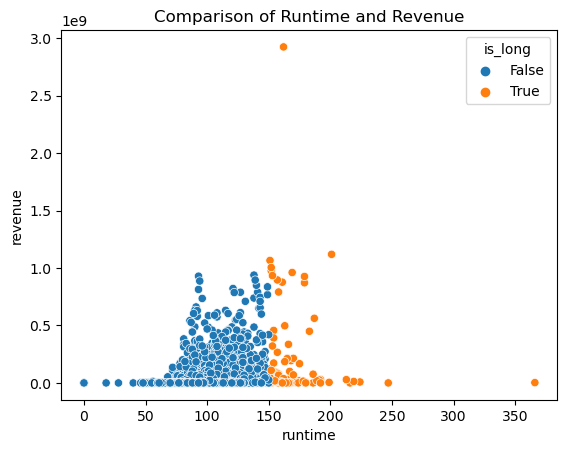

In [54]:
#Regression plot of revenue and runtime
ax = sns.scatterplot(data = df, x = 'runtime', y = 'revenue', hue= 'is_long')
ax.set_title('Comparison of Runtime and Revenue');

## Hypothesis Test 3:

- Do movies with higher average votes generate more revenue than movies with lower average votes?

### State Hypotheses:

- Null: There is no difference in revenue between movies with large votes and movies with small votes.
- Alternative: There is a significant difference between revenue generated between movies with large votes and movies with small votes.
- Alpha = 0.05

### Select Test:

- Because we are comparing a numeric outcome (revenue) to a numeric value (average votes), I will use a 2-sample T-test. 

### Select Groups:

- Will split the data into two groups: movies with an average vote of > 5, and movies with an average vote of <= 5.

In [32]:
#Add columns for high and low average votes
df['high_votes'] = df['vote_average'] > 5
df.head()

,imdb_id,release_date,revenue,runtime,vote_average,vote_count,certification,is_long,is_short,high_votes
3,tt0118694,2000-09-29,14204632.0,99.0,8.100,2298.0,PG,False,False,True
4,tt0118852,2000-09-02,0.0,99.0,6.642,53.0,R,False,False,True
5,tt0119273,2000-04-19,0.0,88.0,6.072,188.0,R,False,True,True
6,tt0119495,2000-08-24,0.0,86.0,0.000,0.0,R,False,True,False
10,tt0120467,2002-04-26,14904.0,87.0,5.500,44.0,R,False,True,True


In [35]:
#Separate into two groups
high = df.loc[df['high_votes'] == True, ['revenue', 'high_votes']]
low = df.loc[df['high_votes'] == False, ['revenue', 'high_votes']]
print(f'There are {len(high)} movies with average votes over 5.')
print(f'There are {len(low)} movies with average votes under 5.')

There are 3706 movies with average votes over 5.
There are 1617 movies with average votes under 5.


In [36]:
#Create final groups
high_group = high['revenue']
low_group = low['revenue']
display(high_group.head(), low_group.head())

3      14204632.0
4             0.0
5             0.0
10        14904.0
12    224834564.0
Name: revenue, dtype: float64

6            0.0
20           0.0
23           0.0
27    35134820.0
34    14828081.0
Name: revenue, dtype: float64

### Test Assumptions:

- Assumptions of 2-sample independent t-test:
    - No significant outliers
    - Normality
    - Equal variance

In [37]:
#Check for outliers in high group
zscores_high = stats.zscore(high_group)
outliers_high = abs(zscores_high)>3
np.sum(outliers_high)

76

In [38]:
#Remove outliers
high_group = high_group[(np.abs(stats.zscore(high_group)) < 3)]

In [39]:
#Check for outliers in low group
zscores_low = stats.zscore(low_group)
outliers_low = abs(zscores_low)>3
np.sum(outliers_low)

30

In [40]:
#Remove outliers
low_group = low_group[(np.abs(stats.zscore(low_group)) < 3)]

In [41]:
#Normal test: high group
result_high = stats.normaltest(high_group)
result_high

NormaltestResult(statistic=2182.322593894088, pvalue=0.0)

In [42]:
#Normal test: low group
result_low = stats.normaltest(low_group)
result_low

NormaltestResult(statistic=1906.439617375817, pvalue=0.0)

- We do not have normally distributed data, however, we can continue as usual because our groups are large enough.

In [43]:
#Test for equal variance
result = stats.levene(high_group, low_group)
result

LeveneResult(statistic=390.0110920742335, pvalue=8.87961489192778e-84)

- Again, we do not have equal variance and must the Welch's T-test.

### Execute Test:

- Welch's T-test

In [44]:
#Independent t-test with equal_var set to False
result = stats.ttest_ind(high_group, low_group, equal_var = False)
result

Ttest_indResult(statistic=29.752777913396994, pvalue=2.3774303308393157e-174)

### Interpretation:

- The p-value is much smaller than 0.05, which means we can reject the null hypothesis. There is a significant difference in revenue generated by movies with higher average votes than lower average votes.

### Supporting Visual

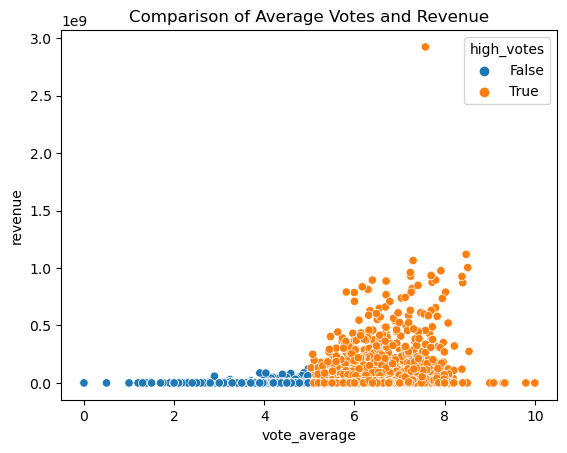

In [48]:
#Scatterplot of average votes
ax = sns.scatterplot(data= df, x= 'vote_average', y= 'revenue', hue= 'high_votes')
ax.set_title('Comparison of Average Votes and Revenue');